In [63]:
# importando las dependencias

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [64]:
wine=pd.read_csv(r'C:\Users\USUARIO\Desktop\Datos\Datos_vino.csv')

In [65]:
#numero de datos en el dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
wine.shape

(1599, 12)

In [67]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [68]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [69]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Analisis de los datos y visualizacion

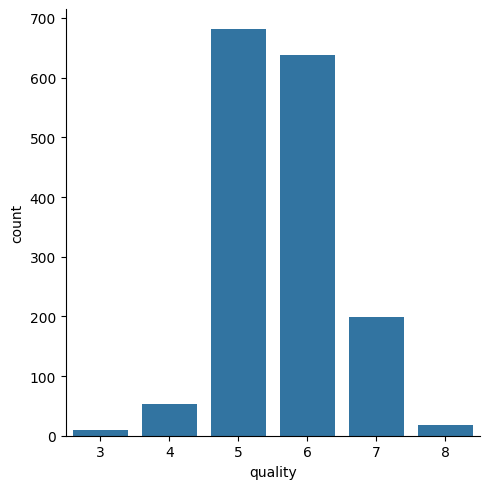

In [70]:
#number os values foreach quality
sns.catplot(x='quality',data=wine,kind='count')   #

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

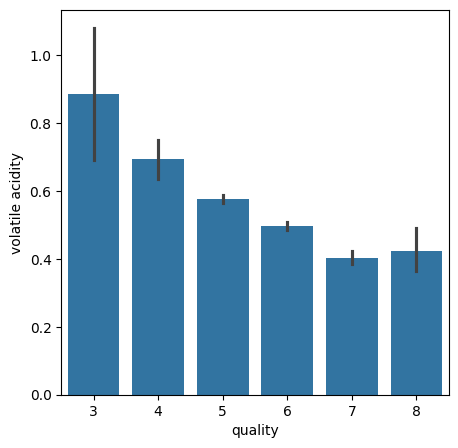

In [71]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine)

In [72]:
correlation=wine.corr()

<AxesSubplot: >

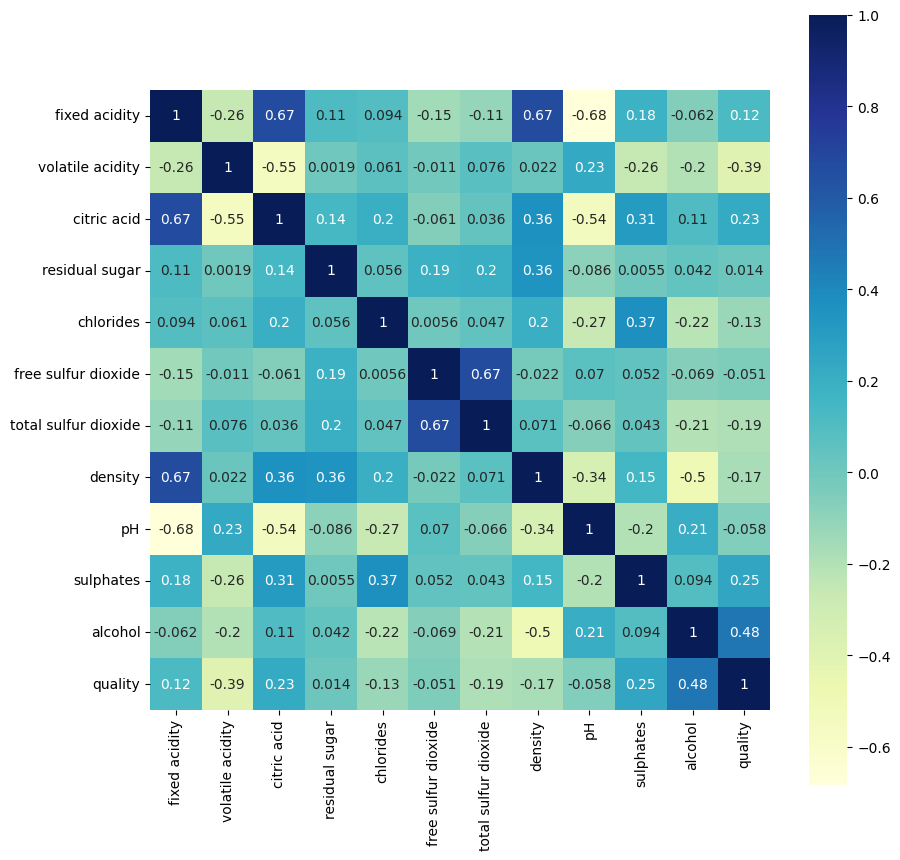

In [73]:
plot=plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True , cmap='YlGnBu',cbar=True ,square=True, annot_kws={"size": 10})

In [74]:
X=wine.drop('quality',axis=1)


In [75]:
Y=wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [77]:
#modelo de entrenamiento Random forest
model=RandomForestClassifier()

In [78]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [80]:
prediccion=model.predict(X_test)
accuracy=accuracy_score(prediccion,Y_test)

In [82]:
print("El accuracy score entre los datos de prueba es de: " , accuracy)

El accuracy score entre los datos de prueba es de:  0.925


In [98]:
#sistema de prediccion
caso=[10.0,0.49,0.2,11.0,0.071,13.0,50.0,1.0015,3.16,0.69,9.2]
caso=np.array(caso)
caso=caso.reshape(1, -1)
prediccion=model.predict(caso)

if(prediccion==0):
    print("El vino no es perfecto")
else:
    print("El vino es perfecto")

El vino no es perfecto


c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [100]:
input=(10.0,0.49,0.2,11.0,0.071,13.0,50.0,1.0015,3.16,0.69,9.2)

input_as_array=np.asarray(input)
input_fila=input_as_array.reshape(1,-1)
prediccion=model.predict(input_fila)

if(prediccion==0):
    print("El vino no es perfecto")
else:
    print("El vino es perfecto")

El vino no es perfecto


c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
